In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

d:\python\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
##import mnist data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data/',one_hot = False)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
##visualize decoder setting
##parameters
#learning_rate = 0.01
learning_rate = 0.001
#training_epochs = 5
training_epochs = 20
batch_size = 256
display_step = 1
#examples_to_show = 10

In [4]:
##network parameters
n_input = 784  ##mnist data input(28*28)

In [5]:
##tf graph input(only picture) 
X = tf.placeholder(tf.float32,[None,n_input])

In [8]:
#hidden layer setting
n_hidden_1 = 256  ##1st layer num feature 
n_hidden_2 = 128  ##2nd layer num feature
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),

    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),

    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),

    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),

}

biases = {

    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),##偏置也用正态分布初始化啊？/

    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),

    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),

    'decoder_b2': tf.Variable(tf.random_normal([n_input])),

}

In [6]:
#hidden layer setting
n_hidden_1 = 128  ##1st layer num feature 
n_hidden_2 =64  ##2nd layer num feature
n_hidden_3 = 10  ##3st layer num feature 
n_hidden_4 = 2  ##4 layer num feature
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),

    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    
    'encoder_h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),

    'encoder_h4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),

    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_4, n_hidden_3])),

    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_2])),
    
    'decoder_h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),

    'decoder_h4': tf.Variable(tf.random_normal([n_hidden_1, n_input])),


}

biases = {

    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),##偏置也用正态分布初始化啊？/

    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
     
    'encoder_b3': tf.Variable(tf.random_normal([n_hidden_3])),##偏置也用正态分布初始化啊？/

    'encoder_b4': tf.Variable(tf.random_normal([n_hidden_4])),

    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_3])),

    'decoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),

    'decoder_b3': tf.Variable(tf.random_normal([n_hidden_1])),

    'decoder_b4': tf.Variable(tf.random_normal([n_input])),
}

In [7]:
##building the encoder
def encoder(x):
     # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['encoder_h3']),
                                   biases['encoder_b3']))
    layer_4 = tf.add(tf.matmul(layer_3, weights['encoder_h4']),
                                   biases['encoder_b4'])   ##注意这里没有激活函数
    return layer_4

In [8]:
##building the decoder
##可以发现这里并没有使用反卷积操作，原因其实：一开始就把图片尺寸拉直了，变成了一维
def decoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['decoder_h3']),
                                   biases['decoder_b3']))
    layer_4 = tf.nn.sigmoid(tf.add(tf.matmul(layer_3, weights['decoder_h4']),
                                   biases['decoder_b4']))
    return layer_4

In [9]:
##construct model
encoder_op = encoder(X)##784--256--128
decoder_op = decoder(encoder_op)  ##128--256--784

In [10]:
##prediction
y_pred = decoder_op
#target(labels) are the input data
y_true = X

In [11]:
# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

Epoch: 0001 cost= 0.106039688
Epoch: 0002 cost= 0.092986651
Epoch: 0003 cost= 0.083734214
Epoch: 0004 cost= 0.076421343
Epoch: 0005 cost= 0.071248122
Epoch: 0006 cost= 0.071054555
Epoch: 0007 cost= 0.068833888
Epoch: 0008 cost= 0.068134271
Epoch: 0009 cost= 0.067743711
Epoch: 0010 cost= 0.064501315
Epoch: 0011 cost= 0.063825294
Epoch: 0012 cost= 0.063918404
Epoch: 0013 cost= 0.062108934
Epoch: 0014 cost= 0.062767893
Epoch: 0015 cost= 0.061378743
Epoch: 0016 cost= 0.060260881
Epoch: 0017 cost= 0.058765985
Epoch: 0018 cost= 0.056247156
Epoch: 0019 cost= 0.055829685
Epoch: 0020 cost= 0.057306398
Optimization Finished!


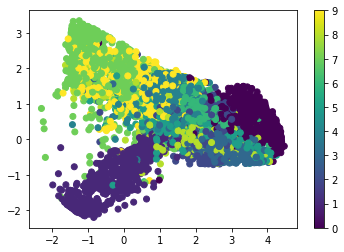

In [13]:
# Launch the graph
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    total_batch = int(mnist.train.num_examples/batch_size)
    # Training cycle
    for epoch in range(training_epochs):
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)  # max(x) = 1, min(x) = 0

            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})

        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(c))
    print("Optimization Finished!")
    #Applying encode and decode over test set
    #encode_decode = sess.run(
     #   y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})
    # Compare original images with their reconstructions
    #f, a = plt.subplots(2, 10, figsize=(10, 2))
    #for i in range(examples_to_show):
     #   a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
      #  a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
    #plt.show()
    
    encoder_result = sess.run(encoder_op, feed_dict={X: mnist.test.images})

    plt.scatter(encoder_result[:, 0], encoder_result[:, 1], c=mnist.test.labels)

    plt.colorbar()

    plt.show()

